# Explore here

In [5]:
# Your code here

import os
import requests

# Define paths for raw and processed folders
raw_data_path = '../data/raw/AB_NYC_2019.csv'

# URL of the dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

# Download the data if it's not already in the raw folder
if not os.path.exists(raw_data_path):
    response = requests.get(url)
    with open(raw_data_path, 'wb') as file:
        file.write(response.content)
    print(f"Dataset downloaded and saved to {raw_data_path}")
else:
    print(f"Dataset already exists at {raw_data_path}")



Dataset downloaded and saved to ../data/raw/AB_NYC_2019.csv


In [7]:
import pandas as pd

# Corrected file path
data_path = '../data/raw/AB_NYC_2019.csv'

# Load the dataset
data = pd.read_csv(data_path)

# Check the first few rows
data.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Get an overview of the dataset
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

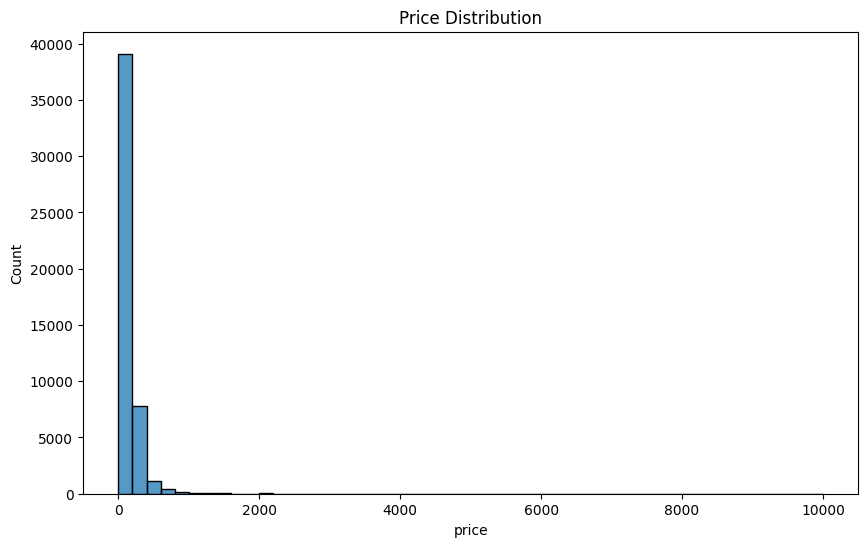

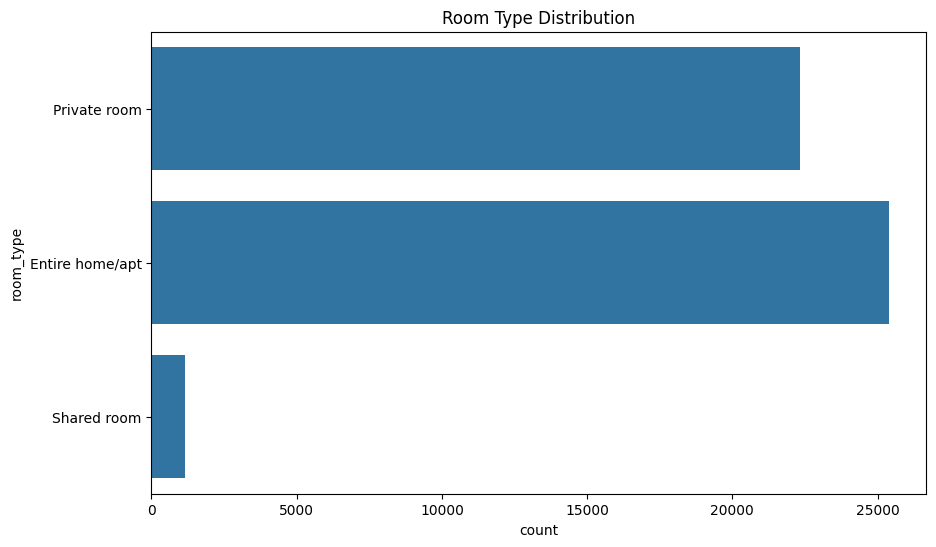

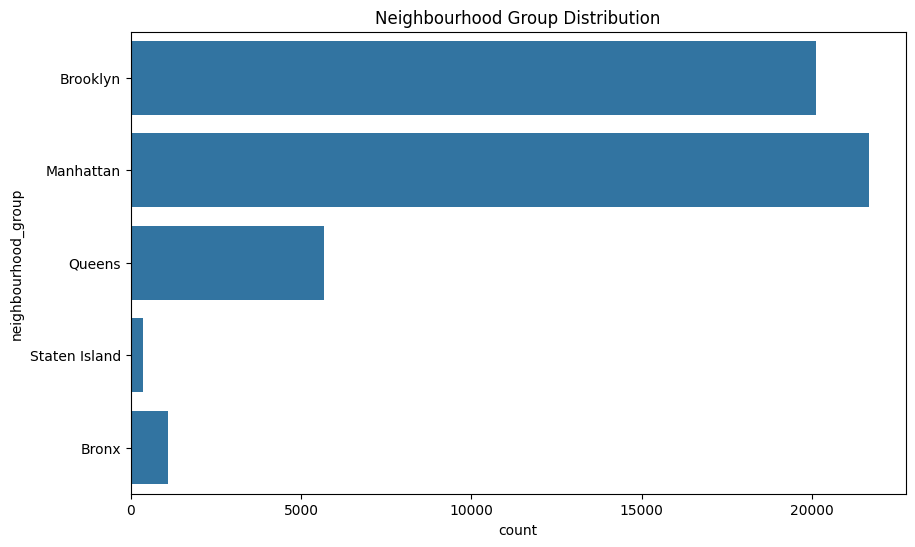

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'price'
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=50)
plt.title('Price Distribution')
plt.show()

# Visualize the distribution of 'room_type'
plt.figure(figsize=(10,6))
sns.countplot(y='room_type', data=data)
plt.title('Room Type Distribution')
plt.show()

# Visualize the distribution of 'neighbourhood_group'
plt.figure(figsize=(10,6))
sns.countplot(y='neighbourhood_group', data=data)
plt.title('Neighbourhood Group Distribution')
plt.show()


In [10]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if necessary
data = data.drop_duplicates()

# Handle missing values (you may need to drop or impute them based on the context)
# For example, you can drop rows with missing values like this:
data_cleaned = data.dropna()

# Or impute missing values for specific columns
data_cleaned['price'].fillna(data['price'].mean(), inplace=True)


Number of duplicate rows: 0


/tmp/ipykernel_3274/387991160.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['price'].fillna(data['price'].mean(), inplace=True)
/tmp/ipykernel_3274/387991160.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price'].fillna(data['price'].mean(), inplace=True)


In [11]:
# Drop irrelevant columns
data_cleaned = data_cleaned.drop(columns=['id', 'name', 'host_name'])

# Check the remaining columns
print(data_cleaned.columns)


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (80/20 split)
train, test = train_test_split(data_cleaned, test_size=0.2, random_state=42)

print(f"Train set: {train.shape}, Test set: {test.shape}")


Train set: (31056, 13), Test set: (7765, 13)


In [13]:
import os

# Define the paths for saving the processed datasets
processed_data_path_train = '../data/processed/train.csv'
processed_data_path_test = '../data/processed/test.csv'

# Create directories if they don't exist
os.makedirs('../data/processed', exist_ok=True)

# Save train and test datasets
train.to_csv(processed_data_path_train, index=False)
test.to_csv(processed_data_path_test, index=False)

print(f"Processed train dataset saved to {processed_data_path_train}")
print(f"Processed test dataset saved to {processed_data_path_test}")


Processed train dataset saved to ../data/processed/train.csv
Processed test dataset saved to ../data/processed/test.csv


In [14]:
# In .gitignore, add:
data/*


SyntaxError: invalid syntax (2056865110.py, line 2)